# Homework 4

## Your Name Here (or your names here if you are pair programming)
Riley Sample
rcs3396

## Linear Regression with Gradient Descent

Your task in this assignment is to implement Multiple Linear Regression. 

We will use the New York City Taxi trip reports in the Year 2013. 
The dataset was released under the FOIL (The Freedom of Information Law) and made public by Chris Whong (\url{https://chriswhong.com/open-data/foil_nyc_taxi/}).



# Taxi Data Set
The data set itself is a simple text file. Each taxi trip report is a different line in the file. Among other things, each trip report 
includes the starting point, the drop-off point, corresponding timestamps, and information related to the payment. The data are reported 
by the time that the trip ended, i.e., upon arriving in the order of the drop-off timestamps. 
The attributes present on each line of the file are, in order:



| index | **Attribute** | **Description** |
| --- | --- | --- |
| 0 | medallion           |  an md5sum of the identifier of the taxi - vehicle bound (Taxi ID)  | 
| 1 | hack license       |  an md5sum of the identifier for the taxi license (Driver ID)  |  
| 2 | pickup datetime    | time when the passenger(s) were picked up  |  
| 3 | dropoff datetime   | time when the passenger(s) were dropped off  | 
| 4 | trip time in secs | duration of the trip  |  
| 5 | trip distance | trip distance in miles  |  
| 6 | pickup longitude | longitude coordinate of the pickup location  |  
| 7 | pickup latitude | latitude coordinate of the pickup location  |  
| 8 | dropoff longitude | longitude coordinate of the drop-off location   |  
| 9 | dropoff latitude | latitude coordinate of the drop-off location  | 
| 10 | payment type | the payment method -credit card or cash  |  
| 11 | fare amount | fare amount in dollars  |  
| 12 | surcharge | surcharge in dollars  |  
| 13 | mta tax | tax in dollars  |  
| 14 | tip amount | tip in dollars  |  
| 15 | tolls amount | bridge and tunnel tolls in dollars  |  
| 16 | total amount | total paid amount in dollars  |  




The data files are in comma separated values (CSV) format. Example lines from the file are:

07290D3599E7A0D62097A346EFCC1FB5,E7750A37CAB07D0DFF0AF7E3573AC141,\\
2013-01-01,00:00:00,2013-01-01 00:02:00,120,0.44,-73.956528,40.716976,-73.962440,\\
40.715008,CSH,3.50,0.50,0.50,0.00,0.00,4.50

22D70BF00EEB0ADC83BA8177BB861991,3FF2709163DE7036FCAA4E5A3324E4BF,\\
2013-01-01,00:02:00,2013-01-01 00:02:00,0,0.00,0.000000,0.000000,0.000000,0.000000,\\
CSH,27.00,0.00,0.50,0.00,0.00,27.50

0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,\\
2013-01-01,00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897\\
73.965897,40.760445,CSH,4.00,0.50,0.50,0.00,0.00,5.00



In [ ]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [ ]:
df = pd.read_csv('nyc-taxi-data.csv.bz2')

## Task - 1
The dataset is a real-world dataset and many records are incorrect and wrong. Your task is first to describe at least 4 data clean up tasks and implement them on this data set.

For example, you can define to remove lines with the following property, if a taxi trip (one of the data rows) has a travel distance less than 1 mile and total amount of more than 20 dollar, then it is an wrong record. 

Another example is that you would expect to have a float number (e.g., index 12 to 16) and then you got a String in that position. You can remove such lines from your data. 

Perform the following cleanup tasks:
1. Add column headers based on the description above (no need to describe).
2. Drop rows with a travel distance < 1 mile and a total fare > $20 (no need to describe). Both conditions need to be met.
3. Your own task (please describe your task in a comment/cell).
4. Your own task (please describe your task in a comment/cell).

**(4 points)**

In [ ]:
# Your code here
df.columns = ['medallion', 'hack license', 'pickup datetime', 'dropoff datetime', 'trip time in secs', 
              'trip distance', 'pickup longitude', 'pickup latitude', 'dropoff longitude', 
              'dropoff latitude', 'payment type', 'fare amount', 'surcharge', 'mta tax', 'tip amount', 
              'tolls amount', 'total amount']

In [ ]:
# drop trips with < 1 mile and > $20
indexes = df[(df['trip distance'] < 1) & (df['fare amount'] > 20)].index
df = df.drop(indexes)

In [ ]:
# drop trips with 0 distance or time travelled
indexes = df[df['trip distance'] == 0].index
df = df.drop(indexes)



In [ ]:
# drop trips with 0 time travelled
indexes = df[df['trip time in secs'] == 0].index
df = df.drop(indexes)

In [ ]:
df

,medallion,hack license,pickup datetime,dropoff datetime,trip time in secs,trip distance,pickup longitude,pickup latitude,dropoff longitude,dropoff latitude,payment type,fare amount,surcharge,mta tax,tip amount,tolls amount,total amount
1,0EC22AAF491A8BD91F279350C2B010FD,778C92B26AE78A9EBDF96B49C67E4007,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.71,-73.973145,40.752827,-73.965897,40.760445,CSH,4.0,0.5,0.5,0.00,0.0,5.00
2,1390FB380189DF6BBFDA4DC847CAD14F,BE317B986700F63C43438482792C8654,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.48,-74.004173,40.720947,-74.003838,40.726189,CSH,4.0,0.5,0.5,0.00,0.0,5.00
3,3B4129883A1D05BE89F2C929DE136281,7077F9FD5AD649AEACA4746B2537E3FA,2013-01-01 00:01:00,2013-01-01 00:03:00,120,0.61,-73.987373,40.724861,-73.983772,40.730995,CRD,4.0,0.5,0.5,0.00,0.0,5.00
5,DFBFA82ECA8F7059B89C3E8B93DAA377,CF8604E72D83840FBA1978C2D2FC9CDB,2013-01-01 00:02:00,2013-01-01 00:03:00,60,0.39,-73.981544,40.781475,-73.979439,40.784386,CRD,3.0,0.5,0.5,0.70,0.0,4.70
7,468244D1361B8A3EB8D206CC394BC9E9,BB899DFEA9CC964B50C540A1D685CCFB,2013-01-01 00:00:00,2013-01-01 00:04:00,240,1.71,-73.955383,40.779728,-73.967758,40.760326,CSH,6.5,0.5,0.5,0.00,0.0,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,A0AFE6B722F15B7A0FDFEEA954BE316A,93D505C96BD248DC390FD47F747D762D,2013-01-01 03:44:00,2013-01-01 03:46:00,120,0.79,-73.963593,40.710941,-74.027779,40.629894,CSH,4.5,0.5,0.5,0.00,0.0,5.50
49995,A0DEAEC3D5592AE94B876356F12F8158,6A35995FBD5399AB131B89623C344782,2013-01-01 03:35:00,2013-01-01 03:46:00,660,2.41,-73.955833,40.768272,-73.987724,40.775490,CRD,10.0,0.5,0.5,2.10,0.0,13.10
49996,A154EFA0695A29423B078C7F5D5B2CB5,F38E7C3381F28C9B3E51C0B6DDBDF68A,2013-01-01 03:40:00,2013-01-01 03:46:00,360,1.63,-73.963951,40.709934,-73.949364,40.695381,CRD,7.0,0.5,0.5,2.25,0.0,10.25
49997,A2B97CECFEA4C8DE45D8FC251E80AF1D,68AE01DDBDEDDFF772905561744A1072,2013-01-01 03:34:00,2013-01-01 03:46:00,720,4.04,-73.952759,40.776524,-73.983093,40.738796,CRD,14.5,0.5,0.5,3.00,0.0,18.50


## Task - 2
Use the cleaned dataset from task 1.
Find out the correlations between trip distance, travel time and fare amount. Visualize the correlations in form of Scatterplot matrix. 
Describe the correlations between them. **(4 points)**

In [ ]:
# Your code here
trip_distance = df['trip distance']
travel_time = df['trip time in secs']
fare_amount = df['fare amount']

# find correlations
print('Distance and time corr:', trip_distance.corr(travel_time, method='pearson'))
print('Distance and fare corr:', trip_distance.corr(fare_amount, method='pearson'))
print('Time and fare corr:', travel_time.corr(fare_amount, method='pearson'))

Distance and time corr: 0.7736107904006128
Distance and fare corr: 0.9380393767987177
Time and fare corr: 0.847943700514623


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2b672ce50>,
      dtype=object)

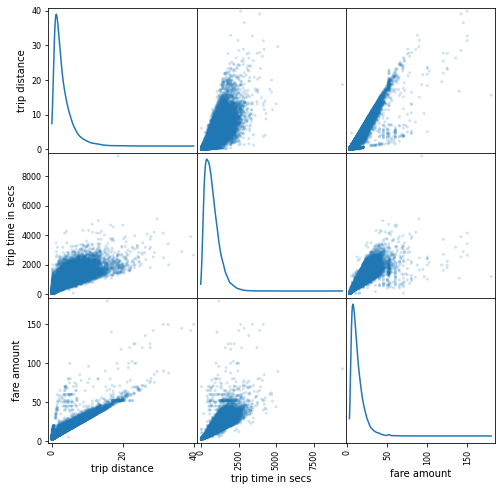

In [ ]:
# create scatter matrix
plot = df[['trip distance', 'trip time in secs', 'fare amount']]
scatter_matrix(plot, alpha = 0.2, figsize = (8, 8), diagonal = 'kde')

In [ ]:
# Each variable has a positive correlation very close to 1 
# indicating that they are all heavily influenced by one another

## Task - 3
Use the cleaned dataset from task 1.
We want to find a simple line to our data (distance, money). 
We want to use trip distance, and fare amount. Use the **Scikit-learn** library to fit a line into the data. **(2 points)**

* Provide the Regression Cofficients of your model
* Write down your linear regression equation. 
* Use your model to predict the fare amount for a 3 miles trip. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [ ]:
# Your code here
from sklearn.linear_model import LinearRegression
trip_distance = df['trip distance']
predictor = np.vstack(trip_distance)
fare_amount = df['fare amount']

# fit line into data
reg = LinearRegression().fit(predictor, fare_amount)

# print m and b
print('coef:', reg.coef_)
print('int:', reg.intercept_)

# equation is y = 2.862x + 3.746
# predict price of 3 mile trip
fare = reg.coef_[0] * 3 + reg.intercept_
print('Fare amount for 3 mile trip:', fare)


coef: [2.86177338]
int: 3.74595282817101
Fare amount for 3 mile trip: 12.331272968701231


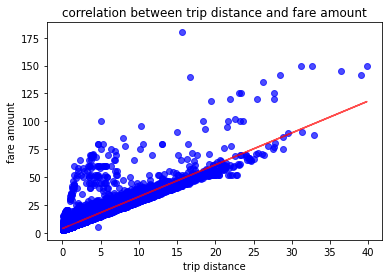

In [ ]:
fig = plt.figure()
plt.title('correlation between trip distance and fare amount')
plt.xlabel('trip distance')
plt.ylabel('fare amount')
plt.scatter(trip_distance, fare_amount, c='blue', alpha=.7, label="Fare Amount")
plt.plot(trip_distance, reg.predict(predictor), c='red', alpha=.7, label="Prediction of Fare")

## Task - 4
Fit a Multiple Linear Regression hyperplane into this data. We are interested to predict total amount out of trip distance, tavel time. **(4 points)**
Use the **Scikit-learn** library.

* Provide the Regression Cofficients of your model
* Write down your Multiple Linear Regression equation. 
* Use your model to predict the total amount for a 3 miles trip and 6 min travel time. 

A visualization of the model is not required, but it would be nice to have and good practice.

In [ ]:
# Your code here
trip_distance = df['trip distance']
travel_time = df['trip time in secs']
total_amount = df['total amount']
X = np.vstack((trip_distance, travel_time)).T


# fit line into data
reg = LinearRegression().fit(X, total_amount)

# print m and b
print('coef:', reg.coef_)
print('int:', reg.intercept_)

# equation is y = 2.431x1 + .006x2 + 3.068
# predict price of 3 mile trip, 6 min travel time
total = (reg.coef_[0] * 3) + (reg.coef_[1] * 6) + reg.intercept_
print('Total amount for 3 mile trip, 6 min travel time:', total)

coef: [2.43066945 0.00554518]
int: 3.0681673766396056
Total amount for 3 mile trip, 6 min travel time: 10.393446830886418


## Task - 5 - Gradient Descent
Implement the gradient descent optimization to find the optimal parameters for our Simple Linear Regression model of task 3. **(6 points)**

* Define and set your learning rate (start with a very small number and increase it if your GC works)
* Instantiate all coefficients from zero
* Run maximum 400 interations. You can stop if your cost converge with a precision of 0.01 
* Print and visualize the optimization costs
* Provide the Regression Coefficients of your model after stop or convergance. 

Please note that a visualization **is** required, unlike in Task 3 and 4.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


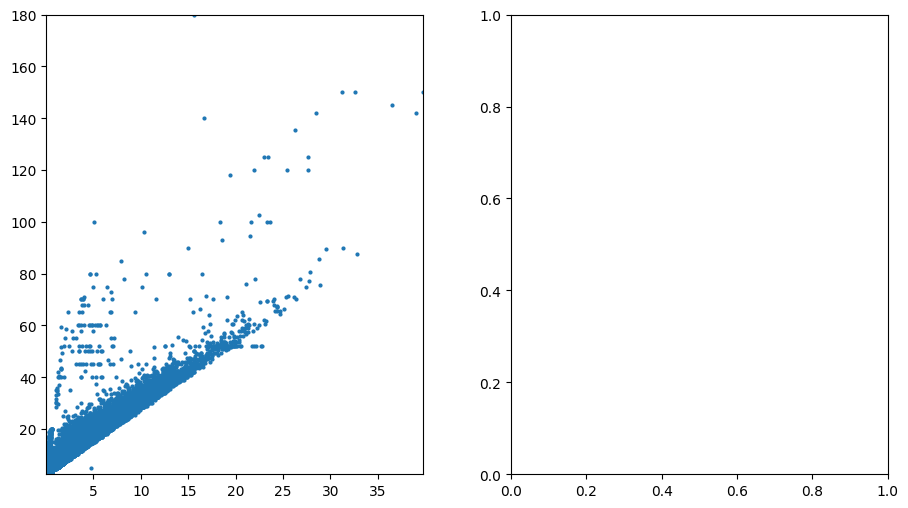

In [ ]:
# delcare x and y
x = df['trip distance']
y = df['fare amount']

###### fig = plt.figure()
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)

In [ ]:
# building model
m = 0
b = 0

learning = 0.0001
iteration = 400

precision = 0.01

n = float(len(y))
print('Sample size:', n)

oldcost = 0
xx, costHist = [], []
y_pred = m*x + b
initCost = (1/n) * sum((y_pred - y)**2)

for i in range(iteration):
  # calc prediction
  y_pred = m*x + b

  # compute cost
  cost = (1/n) * sum((y_pred - y)**2)

  # gradients
  m_gradient = (1/n) * sum(x * (y_pred - y))
  b_gradient = (1/n) * sum(y_pred - y)

  # update m and b values
  m = m - learning * m_gradient
  b = b - learning * b_gradient

  if (abs(cost - oldcost) <= precision):
    print('Stopped at iteration', i)
    break

  oldcost = cost

  # don't understand animation
  # visualize
  x_vals = np.array(ax1.get_xlim())
  y_vals = m * x_vals  + b
    
  ax1.clear()
  ax1.set_xlim(left = np.min(x), right=np.max(x))
  ax1.set_ylim(bottom = np.min(y), top=np.max(y))
  ax1.plot(x, y, 'o', markersize=2)
  ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)

  # update cost diagram
  xx.append(i)
  costHist.append(cost)    
  ax2.plot(xx, costHist, color='blue')

  fig.canvas.draw()

  if(i % 100 ==0):
        print("Iteration No.=", i ," m = ", m, " b=", b, " Cost=", cost) 

print("m = ", m, " b=", b)


Sample size: 49484.0
Iteration No.= 0  m =  0.006233762438565993  b= 0.0012700153382911648  Cost= 234.79670298480315
Iteration No.= 100  m =  0.5752482169136481  b= 0.11838330572853549  Cost= 166.92486505913257
Iteration No.= 200  m =  1.0488434077962232  b= 0.2181334473679734  Cost= 119.81737128433024
Iteration No.= 300  m =  1.4429553998431615  b= 0.30341049316044033  Cost= 87.11836661237032
Iteration No.= 400  m =  1.7708590394327508  b= 0.37662191834487335  Cost= 64.41751799021279
Iteration No.= 500  m =  2.043612359387738  b= 0.4397732074017987  Cost= 48.654491432825026
Iteration No.= 600  m =  2.2704267713118877  b= 0.4945349835128089  Cost= 37.7057182512952
Iteration No.= 700  m =  2.4589754384044666  b= 0.5422989278722283  Cost= 30.09765185202793
Iteration No.= 800  m =  2.6156501521789517  b= 0.5842243608669597  Cost= 24.80779643089928
Iteration No.= 900  m =  2.7457753125724733  b= 0.6212770445269914  Cost= 21.126640646139336
Iteration No.= 1000  m =  2.8537861748787465  b= 0

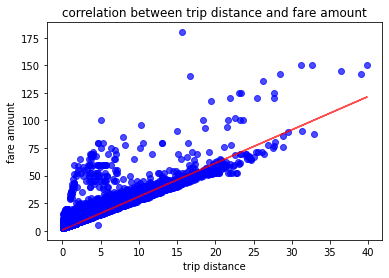

In [ ]:
# show line from gradient 
fig = plt.figure()
plt.title('correlation between trip distance and fare amount')
plt.xlabel('trip distance')
plt.ylabel('fare amount')
plt.scatter(x, y, c='blue', alpha=.7, label="Fare Amount")
line = m*x + b
plt.plot(trip_distance, line, c='red', alpha=.7, label="Prediction of Fare")